In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# SEVDA ATPINAR

# Data

In [2]:
url = 'https://raw.githubusercontent.com/globalaihub/introduction-to-machine-learning/main/Final%20Project/diamonds.csv'
df = pd.read_csv(url, error_bad_lines=False)


# Exploratory Data Analysis

In [3]:
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


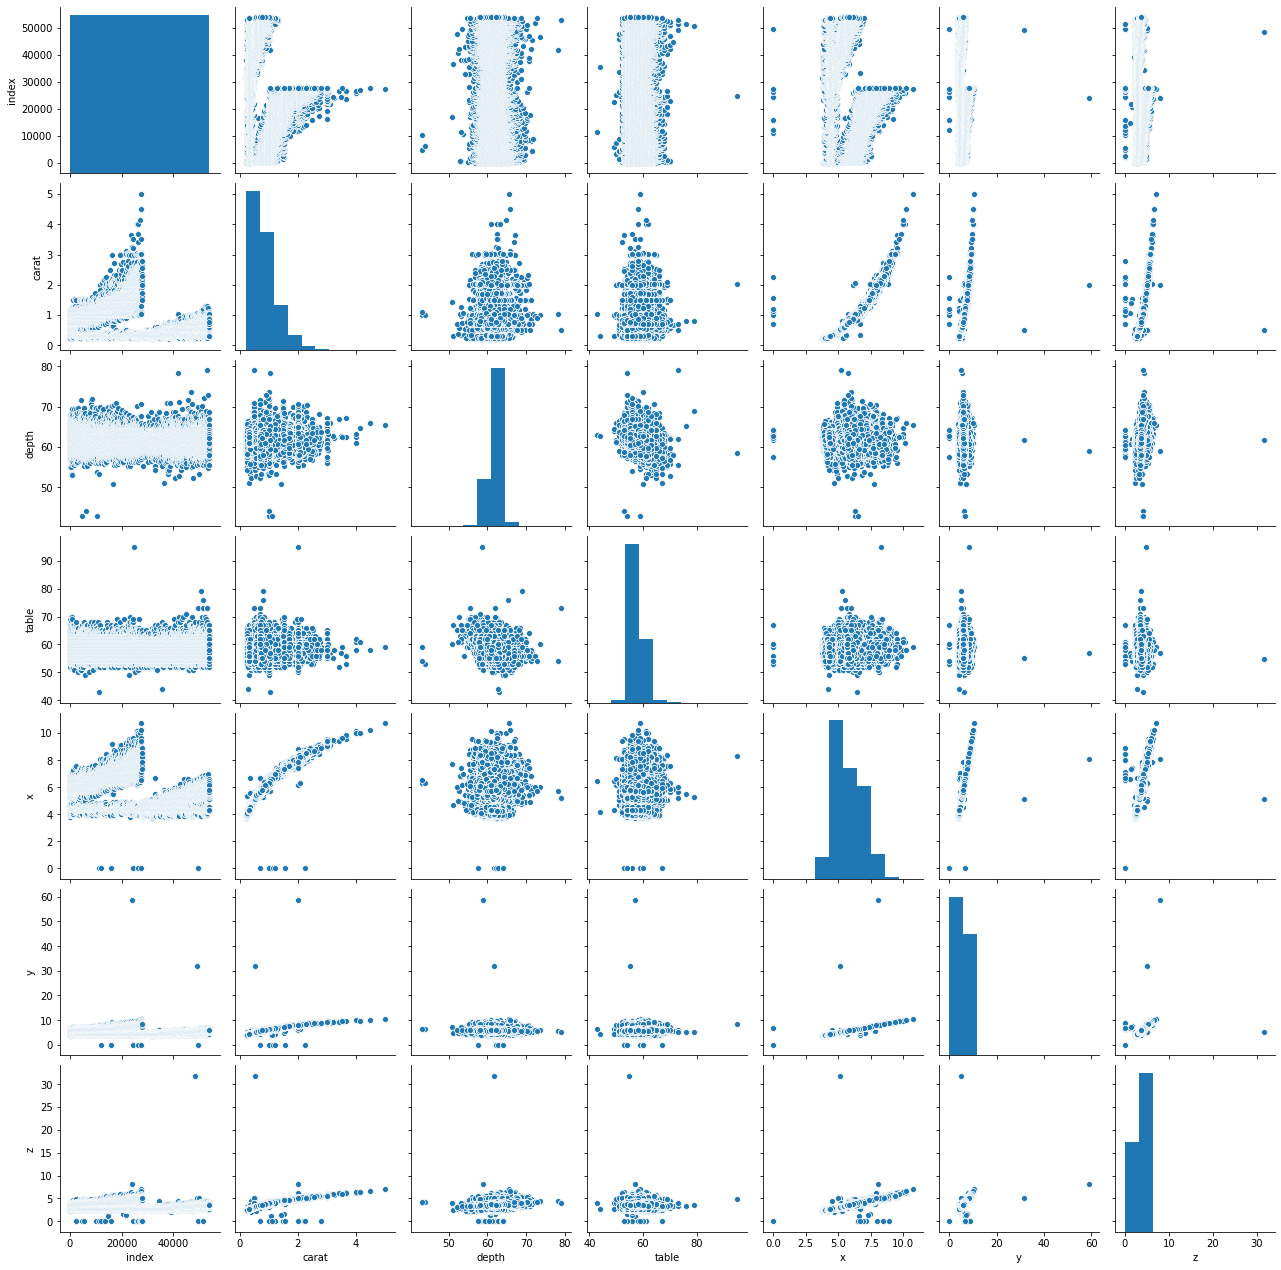

In [8]:
import seaborn as sns
sns.pairplot(df)

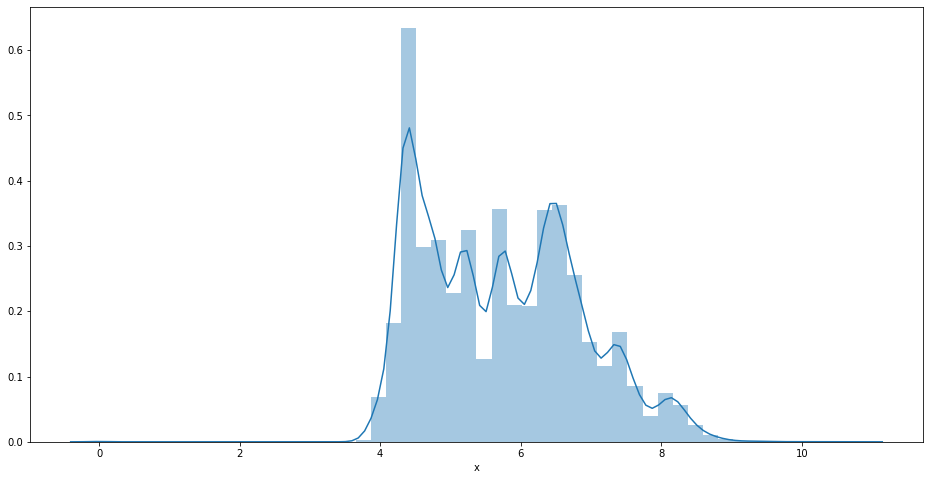

In [9]:
plt.figure(figsize=(16, 8))
sns.distplot(df['x'])

Text(0.5, 1.0, 'Distribution of Diamond Carat Weight')

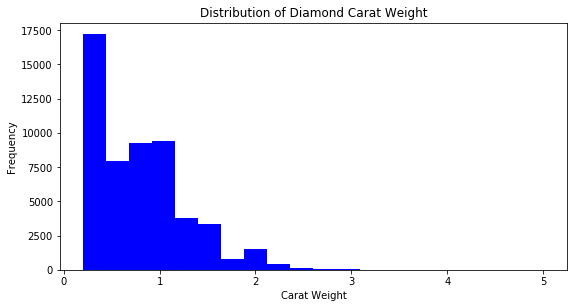

In [11]:
plt.subplot(221)
plt.hist(df['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

Text(0.5, 1.0, 'Distribution of Diamond Depth')

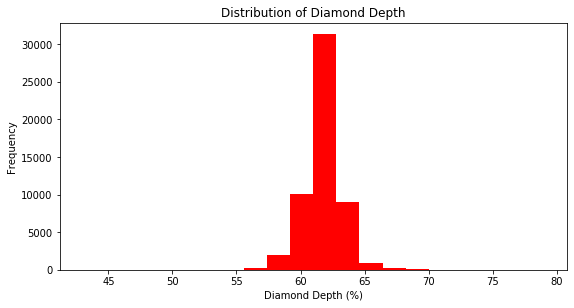

In [12]:
plt.subplot(221)
plt.hist(df['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

Text(0.5, 1.0, 'Distribution of Diamond Price')

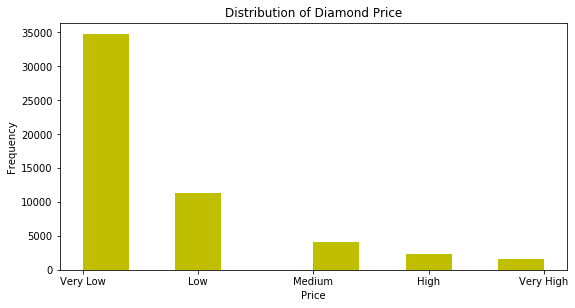

In [13]:
plt.subplot(223)
plt.hist(df['price'],bins=10,color='y')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

Text(0.5, 1.0, 'Distribution of Diamond Cut')

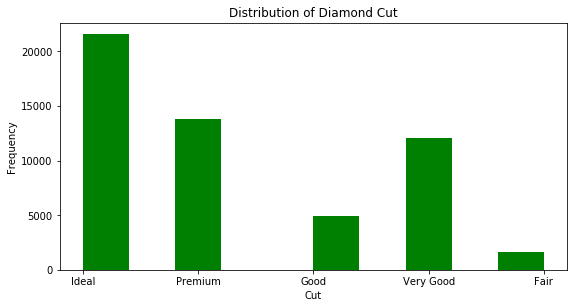

In [14]:
plt.subplot(224)
plt.hist(df['cut'],bins=10,color='g')
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Cut')

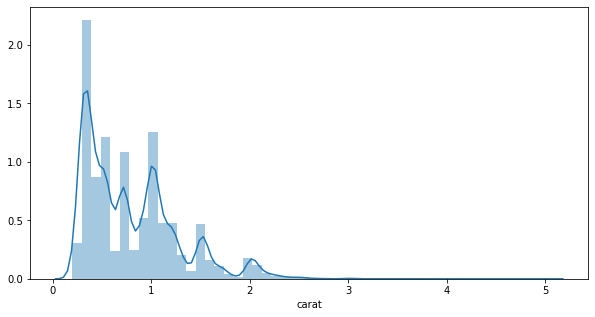

In [15]:
plt.figure(figsize=(10, 5))
sns.distplot(df["carat"])

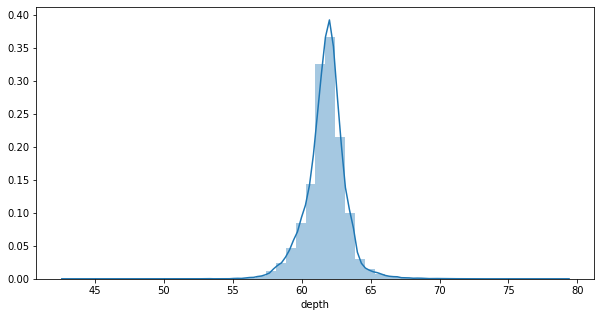

In [16]:
plt.figure(figsize=(10, 5))
sns.distplot(df["depth"])

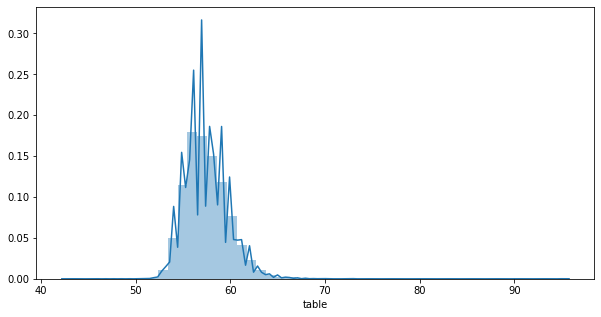

In [17]:
plt.figure(figsize=(10, 5))
sns.distplot(df["table"])

# Preprocessing

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       53940 non-null  float64
 1   depth       53940 non-null  float64
 2   table       53940 non-null  float64
 3   x           53940 non-null  float64
 4   y           53940 non-null  float64
 5   z           53940 non-null  float64
 6   NumCut      53940 non-null  int64  
 7   NumColor    53940 non-null  int64  
 8   NumClarity  53940 non-null  int64  
 9   NumPrice    53940 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [102]:
df.describe()

,carat,depth,table,x,y,z,NumCut,NumColor,NumClarity,NumPrice
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,2.553003,2.594197,3.835150,3.020171
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,1.027708,1.701105,1.724591,1.392602
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,2.000000,1.000000,2.000000,1.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2.000000,3.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,3.000000,4.000000,5.000000,4.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,4.000000,6.000000,7.000000,4.000000


In [103]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [101]:
df.isnull().sum()

carat         0
depth         0
table         0
x             0
y             0
z             0
NumCut        0
NumColor      0
NumClarity    0
NumPrice      0
dtype: int64

In [18]:
df.groupby(by='price').count()

,index,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,,
High,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
Low,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271
Medium,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
Very Low,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663


In [19]:
df.groupby(by='cut').count()

,index,carat,color,clarity,depth,table,x,y,z,price
cut,,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [20]:
df.groupby(by='clarity').count()

,index,carat,cut,color,depth,table,x,y,z,price
clarity,,,,,,,,,,
I1,741,741,741,741,741,741,741,741,741,741
IF,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790
SI1,13065,13065,13065,13065,13065,13065,13065,13065,13065,13065
SI2,9194,9194,9194,9194,9194,9194,9194,9194,9194,9194
VS1,8171,8171,8171,8171,8171,8171,8171,8171,8171,8171
VS2,12258,12258,12258,12258,12258,12258,12258,12258,12258,12258
VVS1,3655,3655,3655,3655,3655,3655,3655,3655,3655,3655
VVS2,5066,5066,5066,5066,5066,5066,5066,5066,5066,5066


In [21]:
df.groupby(by='carat').count()

,index,cut,color,clarity,depth,table,x,y,z,price
carat,,,,,,,,,,
0.20,12,12,12,12,12,12,12,12,12,12
0.21,9,9,9,9,9,9,9,9,9,9
0.22,5,5,5,5,5,5,5,5,5,5
0.23,293,293,293,293,293,293,293,293,293,293
0.24,254,254,254,254,254,254,254,254,254,254
...,...,...,...,...,...,...,...,...,...,...
4.00,1,1,1,1,1,1,1,1,1,1
4.01,2,2,2,2,2,2,2,2,2,2
4.13,1,1,1,1,1,1,1,1,1,1


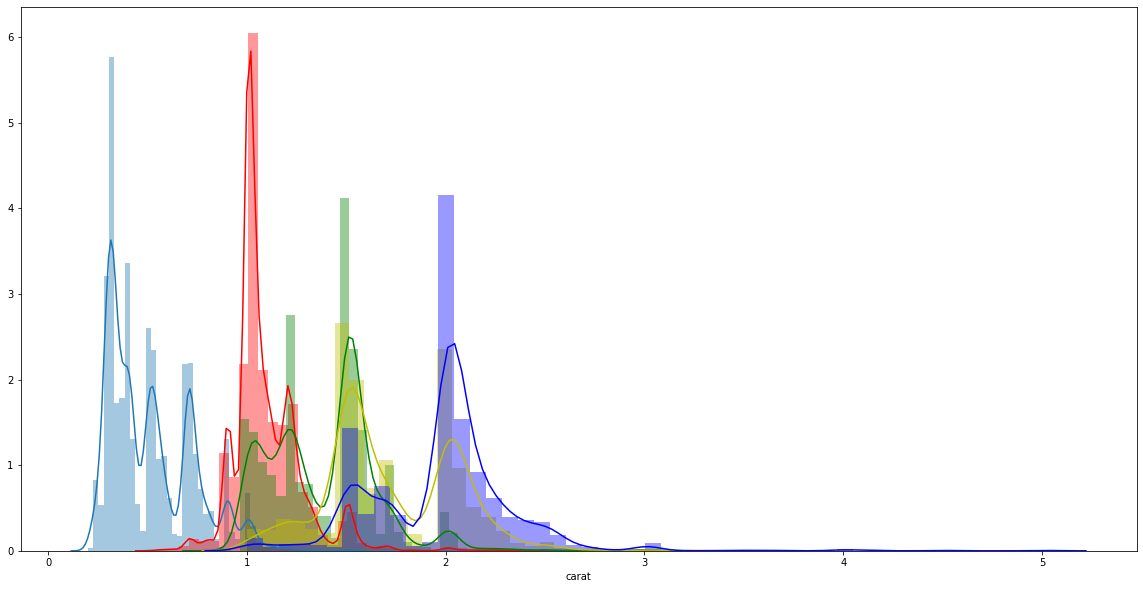

In [23]:
sns.distplot(df[df.price == 'Very Low'].carat)
sns.distplot(df[df.price == 'Low'].carat,color="r")
sns.distplot(df[df.price == 'Medium'].carat,color="g")
sns.distplot(df[df.price == 'High'].carat,color="y")
sns.distplot(df[df.price == 'Very High'].carat,color="b")

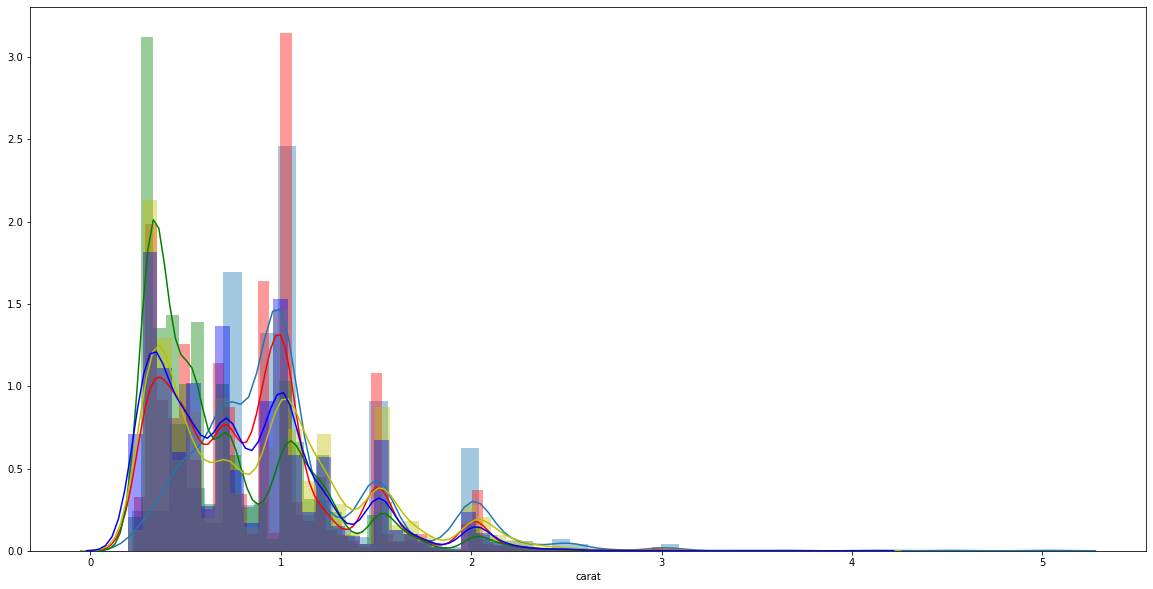

In [24]:
sns.distplot(df[df.cut == 'Fair'].carat)
sns.distplot(df[df.cut == 'Good'].carat,color="r")
sns.distplot(df[df.cut == 'Ideal'].carat,color="g")
sns.distplot(df[df.cut == 'Premium'].carat,color="y")
sns.distplot(df[df.cut == 'Very Good'].carat,color="b")

In [28]:
df.corr()

,index,carat,depth,table,x,y,z
index,1.000000,-0.377983,-0.034800,-0.100830,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,-0.405440,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


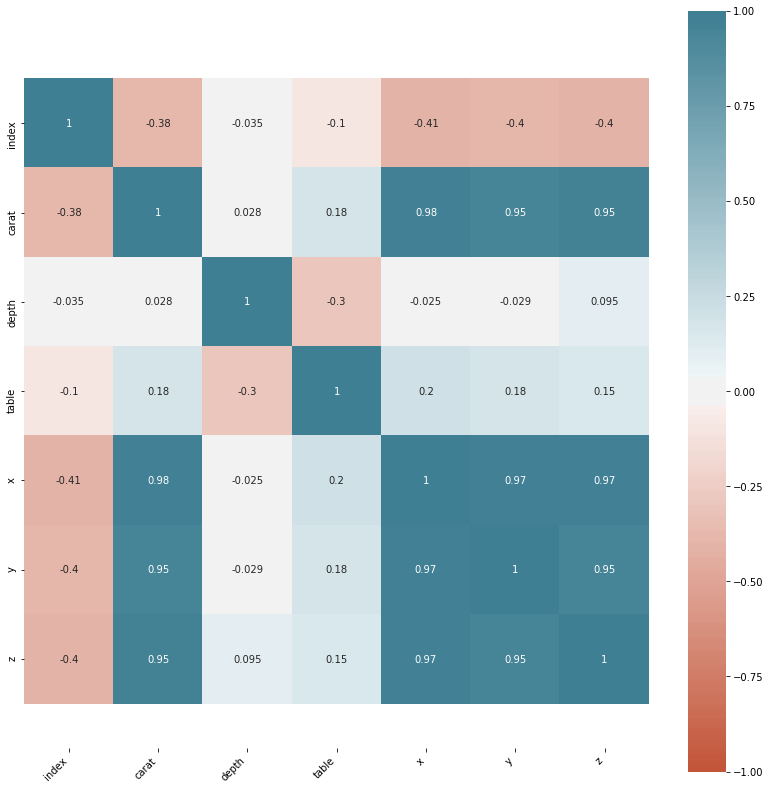

In [29]:
# Correlation of the features
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
#Encoding the label
label_encoder = LabelEncoder()
df['NumCut'] = label_encoder.fit_transform(df['cut']) 
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,NumCut
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,2
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,3
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,1
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,3
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,1


In [32]:
df["NumCut"].value_counts()

2    21551
3    13791
4    12082
1     4906
0     1610
Name: NumCut, dtype: int64

In [33]:
# Checking encoded labels
categories = list(label_encoder.inverse_transform([0, 1, 2,3,4]))
categories

['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [34]:
#Encoding the label
label_encoder = LabelEncoder()
df['NumColor'] = label_encoder.fit_transform(df['color']) 
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,NumCut,NumColor
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,2,1
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,3,1
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,1,1
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,3,5
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,1,6


In [35]:
df["NumColor"].value_counts()

3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: NumColor, dtype: int64

In [36]:
# Checking encoded labels
categories = list(label_encoder.inverse_transform([0, 1, 2,3,4,5,6]))
categories

['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [37]:
#Encoding the label
label_encoder = LabelEncoder()
df['NumClarity'] = label_encoder.fit_transform(df['clarity']) 
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,NumCut,NumColor,NumClarity
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,2,1,3
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,3,1,2
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,1,1,4
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,3,5,5
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,1,6,3


In [38]:
df["NumClarity"].value_counts()

2    13065
5    12258
3     9194
4     8171
7     5066
6     3655
1     1790
0      741
Name: NumClarity, dtype: int64

In [39]:
# Checking encoded labels
categories = list(label_encoder.inverse_transform([0, 1, 2,3,4,5,6,7]))
categories

['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']

In [40]:
#Encoding the label
label_encoder = LabelEncoder()
df['NumPrice'] = label_encoder.fit_transform(df['price']) 
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,NumCut,NumColor,NumClarity,NumPrice
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,2,1,3,4
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,3,1,2,4
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,1,1,4,4
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,3,5,5,4
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,1,6,3,4


In [41]:
df["NumPrice"].value_counts()

4    34663
1    11271
2     4109
0     2308
3     1589
Name: NumPrice, dtype: int64

In [42]:
# Checking encoded labels
categories = list(label_encoder.inverse_transform([0, 1, 2,3,4]))
categories

['High', 'Low', 'Medium', 'Very High', 'Very Low']

In [49]:
# Dropping unnecessary columns
df.drop(['cut','color','clarity','price','index'], axis=1, inplace=True)

In [50]:
df.head()

,carat,depth,table,x,y,z,NumCut,NumColor,NumClarity,NumPrice
0,0.23,61.5,55.0,3.95,3.98,2.43,2,1,3,4
1,0.21,59.8,61.0,3.89,3.84,2.31,3,1,2,4
2,0.23,56.9,65.0,4.05,4.07,2.31,1,1,4,4
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5,4
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,3,4


In [93]:
# Locate features and label
X, y = df.iloc[: , :-1], df.iloc[: , -1]

## When we remove Outliers and scale all 3 model overfits.

# ML Application

In [118]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [119]:
#Desicion Tree Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error

clf = DecisionTreeClassifier(max_depth=12, random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print("Mean Absolure error",mean_absolute_error(y_test,y_pred))
print("Mean Sqrt error",np.sqrt((mean_squared_error(y_test,y_pred))))

Accuracy of train: 0.9590746838595423
Accuracy of test: 0.9202853772259986
Mean Absolure error 0.18645019942699848
Mean Sqrt error 0.7029834421260406


In [120]:
#Suppor Vector Regression
from sklearn.svm import SVR
regressor1 = SVR(kernel='rbf')
regressor1.fit(X_train,y_train)
y_pred = regressor1.predict(X_test)
print("Accuracy of train:",regressor1.score(X_train,y_train))
print("Accuracy of test:",regressor1.score(X_test,y_test))
print("Mean Absolure error",mean_absolute_error(y_test,y_pred))
print("Mean Sqrt error",np.sqrt((mean_squared_error(y_test,y_pred))))

Accuracy of train: 0.5294079776700901
Accuracy of test: 0.5275636254439291
Mean Absolure error 0.7406934544185834
Mean Sqrt error 0.9552780592643646


In [122]:
#Polinomial Lineer Reression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
regressor2 = linear_model.LinearRegression()
regressor2.fit(X_train,y_train)
y_pred=regressor2.predict(X_test)
print("Accuracy of train:",regressor2.score(X_train,y_train))
print("Accuracy of test:",regressor2.score(X_test,y_test))
print("Mean Absolure error",mean_absolute_error(y_test,y_pred))
print("Mean Sqrt error",np.sqrt((mean_squared_error(y_test,y_pred))))

Accuracy of train: 0.7499384141646175
Accuracy of test: -253720750.31520808
Mean Absolure error 167.66233122358832
Mean Sqrt error 22137.885319674388


In [123]:
#Confussion matrix fof clf
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_validate
cv = cross_validate(clf,X_train,y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.9161848259902851
Test accuracy: 0.917476546261446


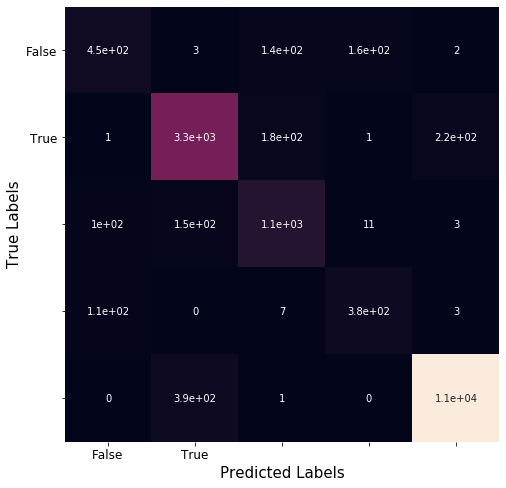

In [124]:
from sklearn.metrics import confusion_matrix

pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
#Confussion matrix fof SVR
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_validate
cv2 = cross_validate(regressor1,X_train,y_train, cv = 2, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv2['test_score'])))
print("Test accuracy: {}".format(cv2["estimator"][0].score(X_test,y_test)))

In [ ]:
pred2 = cv2["estimator"][0].predict(X_test)

cm2 = confusion_matrix(y_test, pred2)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm2, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
#Confussion matrix for Polinomial Lineer Reression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_validate
cv3 = cross_validate(regressor1,X_train,y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv3['test_score'])))
print("Test accuracy: {}".format(cv3["estimator"][0].score(X_test,y_test)))

In [ ]:
pred3 = cv3["estimator"][0].predict(X_test)

cm3 = confusion_matrix(y_test, pred3)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm3, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Evaluation
When scaling and deleting outlires the data overfits and acurracy rate becomes 1.0
Whitout outliers ans scaling Desicion tree model has rates as follows: 
Accuracy of train: 0.9590746838595423
Accuracy of test: 0.9202853772259986.
but after crossvalidaiton the rates ends up closs each other as follows;
Mean training accuracy: 0.9161848259902851
Test accuracy: 0.917476546261446.
For SVR it works realy slow and acurracy rate is low as
Accuracy of train: 0.5294079776700901
Accuracy of test: 0.5275636254439291.
For Polinomial Lineer Reression  acurracy rate train set  not bad but not apt with  test set as follows;  
Accuracy of train: 0.7499384141646175
Accuracy of test: -253720750.31520808.
The best model in this three of them Desicion Tree Regression with max_depth=12.
